Plot 3d smaug data

In [2]:
import numpy as np
from numpy import *
import scipy.io
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import struct

%matplotlib inline  

In [38]:

file = open('/media/mike/data/mike/proj/smaug/tube/tube2_100.out','rb')



file.seek(0,2)
eof = file.tell()
file.seek(0,0)

name = file.read(79)
nit = fromfile(file,dtype=int32,count=1)
t = fromfile(file,dtype=float64,count=1)
ndim=fromfile(file,dtype=int32,count=1)
neqpar=fromfile(file,dtype=int32,count=1)
nw=fromfile(file,dtype=int32,count=1)
#ndata = fromfile(file,dtype=int32,count=ndim)[:ndim]
ndata = fromfile(file,dtype=int32,count=3)
varbuf = fromfile(file,dtype=float,count=6)[:6]
varnames = file.read(79)

#typedef enum vars {rho, mom1, mom2, energy, b1, b2,energyb,rhob,b1b,b2b} CEV;
datcount=(nw+ndim)*ndata[0]*ndata[1]*ndata[2]

#alldat=fromfile(file,dtype=float,count=datcount)[:(nw+ndim)*ndata[0]*ndata[1]]
alldat=fromfile(file,dtype=float,count=datcount[0])
if size(alldat)<(nw+ndim)*ndata[0]*ndata[1]*ndata[2]:
    alldat=resize(alldat,(nw+ndim)*ndata[0]*ndata[1]*ndata[2])
alldat=np.reshape(alldat,(nw[0]+ndim[0],ndata[0],ndata[1],ndata[2]),'C')
#alldat=np.reshape(alldat,(12,256,256),'C')

file.close()

In [32]:
print(ndata)
print(type(datcount))
print(nw)
print(ndim)

[128 128 128]
<class 'numpy.ndarray'>
[13]
[3]


In [33]:
print ('varnames:',varnames)
print ('nit:',nit)
print ('name:',name)
print ('t:',t)
print ('ndim:',ndim)
print ('neqpar:',neqpar)
print ('nw:',nw)
print ('varbuf:',varbuf)

varnames: b'\x00\x00\x00\x00\x00\x00\x00\x00x y z rho mx my mz e bx by bz gamma eta g1 g2 g3\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
nit: [100]
name: b'test1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
t: [0.001717]
ndim: [3]
neqpar: [7]
nw: [13]
varbuf: [   1.66666667    0.         -274.            0.            0.
    0.        ]


In [34]:
rho=alldat[3,:,:,:]+alldat[11,:,:,:]
print(np.min(rho))
print(np.max(rho))

0.33108664731
1992187.5


In [35]:
vz=alldat[4,:,:,:]/(alldat[3,:,:,:]+alldat[11,:,:,:])
print(np.min(vz))
print(np.max(vz))

-1.0491070939137928e-07
2.7905928170009358e-08


In [39]:
iz=8
vzx=alldat[4,:,:,iz]/(alldat[3,:,:,iz]+alldat[11,:,:,iz])
print(np.min(vzx))
print(np.max(vzx))

-1.0491070939137928e-07
8.678013956930765e-09


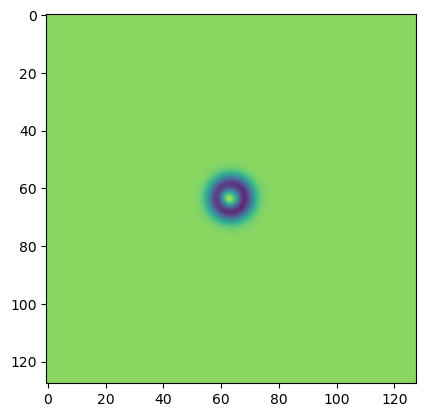

In [40]:
im2 = plt.imshow(vzx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',vmin=-1.1e-7,vmax=2.7e-8)
#im2 = plt.imshow(vzx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')

In [44]:
iy=64
vzx=alldat[4,iy,:,:]/(alldat[3,iy,:,:]+alldat[11,iy,:,:])
print(np.min(vzx))
print(np.max(vzx))

-1.044460252643119e-07
2.7031691755204975e-08


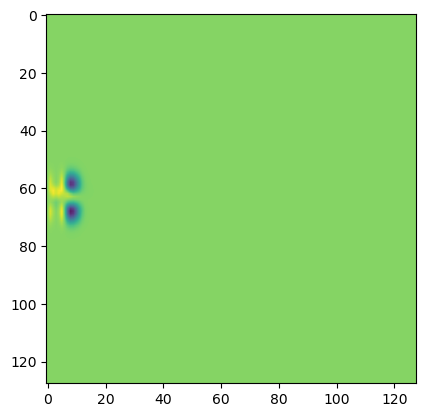

In [45]:
im2 = plt.imshow(vzx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',vmin=np.min(vzx),vmax=np.max(vzx))
#im2 = plt.imshow(vzx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear')

In [48]:
iy=64
bzx=(alldat[8,iy,:,:]+alldat[13,iy,:,:])
print(np.min(bzx))
print(np.max(bzx))

-7.813387154325249e-22
100.32691724027842


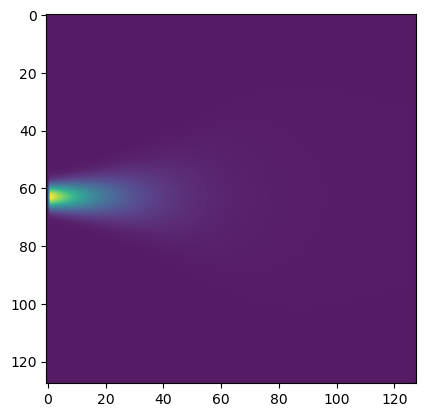

In [49]:
im2 = plt.imshow(bzx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',vmin=np.min(bzx),vmax=np.max(bzx))

In [50]:
iy=64
bzpx=(alldat[8,iy,:,:])
print(np.min(bzpx))
print(np.max(bzpx))

-0.14327287217984738
0.25538252511054044


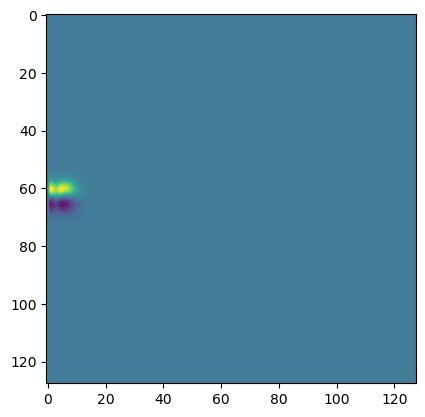

In [51]:
im2 = plt.imshow(bzpx, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',vmin=np.min(bzpx),vmax=np.max(bzpx))